# <center>Data Manipulation</center>
<p>This module focuses on:</p>
<p><li>Data aggregation</li><li>Data Cleaning and Munging</li></p>

Read the category wise product description from the disk. The product description is in a dict format and are evaluated before converting them to a pandas Dataframe. Different pandas DF are concatenated to a single dataframe. 

In [11]:
import pandas as pd
import json
import ast
import os 

prod_df = pd.DataFrame()

path = '/Users/rajesh/Documents/Work/Web Scrapping/Notebooks/'

filenames = os.listdir(path)
for file in filenames:
    if file.split(".")[-1] == 'txt':
        f = open(path+file,'r')
        df = pd.DataFrame.from_dict(ast.literal_eval(f.read()))
        df['ASIN'] = df.url.str.split('/',expand=True)[5]
        f.close()
        prod_df = pd.concat([prod_df,df])

Let's print and check the pandas data frame. 

In [12]:
prod_df

,Category,Sub_category,img_src,title,url,ASIN
0,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Watch Ya' Mouth Family Edition - The Authentic...,https://www.amazon.com/Watch-Ya-Mouth-Family-M...,B01IWALX00
1,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,SmartyPants Kids Complete Gummy Vitamins: Mult...,https://www.amazon.com/SmartyPants-Kids-Comple...,B004QQ9LVS
2,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Anova Culinary PCB-120US-K1 Bluetooth Precisio...,https://www.amazon.com/Anova-Culinary-PCB-120U...,B00UKPBXM4
3,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Joking Hazard,https://www.amazon.com/Joking-Hazard-LLC-JHUS0...,B01IA9R2TY
4,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Tile Mate - Key Finder. Phone Finder. Anything...,https://www.amazon.com/Tile-Mate-Finder-Anythi...,B01L3VEC08
5,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,"Soylent Ready to Drink Food, Original, 14 oz B...",https://www.amazon.com/Soylent-Ready-Drink-Ori...,B01EUEIL3E
6,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,TubShroom The Revolutionary Tub Drain Protecto...,https://www.amazon.com/TubShroom-Revolutionary...,B01BYMTYBS
7,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,iOttie Easy One Touch 3 (V2.0) Car Mount Unive...,https://www.amazon.com/iOttie-Universal-Holder...,B01BZC262Q
8,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,YETI Rambler Stainless Steel Vacuum Insulated ...,https://www.amazon.com/Yeti-Coolers-Rambler-Tu...,B00JP9AJC6
9,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,TubShroom The Revolutionary Tub Drain Protecto...,https://www.amazon.com/TubShroom-Revolutionary...,B01BYRMGCC


Check for Unique values and remove duplicates:

In [13]:
#Check for duplicates
Uniques = prod_df.ASIN.is_unique
print Uniques

if not Uniques:
    prod_df_unique = prod_df.drop_duplicates('ASIN', keep='first') #keep=False will delete both the records
    print prod_df_unique.ASIN.is_unique

False
True


QC Check on the deleted datasets

In [14]:
Original = len(prod_df)
dup_count =  len(prod_df[prod_df.duplicated('ASIN', keep='first')])
unique = len(prod_df_unique)

if Original - dup_count == unique:
    print "QC Success"

QC Success


Lets print and check the pandas dataframe

In [15]:
prod_df_unique

,Category,Sub_category,img_src,title,url,ASIN
0,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Watch Ya' Mouth Family Edition - The Authentic...,https://www.amazon.com/Watch-Ya-Mouth-Family-M...,B01IWALX00
1,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,SmartyPants Kids Complete Gummy Vitamins: Mult...,https://www.amazon.com/SmartyPants-Kids-Comple...,B004QQ9LVS
2,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Anova Culinary PCB-120US-K1 Bluetooth Precisio...,https://www.amazon.com/Anova-Culinary-PCB-120U...,B00UKPBXM4
3,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Joking Hazard,https://www.amazon.com/Joking-Hazard-LLC-JHUS0...,B01IA9R2TY
4,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,Tile Mate - Key Finder. Phone Finder. Anything...,https://www.amazon.com/Tile-Mate-Finder-Anythi...,B01L3VEC08
5,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,"Soylent Ready to Drink Food, Original, 14 oz B...",https://www.amazon.com/Soylent-Ready-Drink-Ori...,B01EUEIL3E
6,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,TubShroom The Revolutionary Tub Drain Protecto...,https://www.amazon.com/TubShroom-Revolutionary...,B01BYMTYBS
7,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,iOttie Easy One Touch 3 (V2.0) Car Mount Unive...,https://www.amazon.com/iOttie-Universal-Holder...,B01BZC262Q
8,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,YETI Rambler Stainless Steel Vacuum Insulated ...,https://www.amazon.com/Yeti-Coolers-Rambler-Tu...,B00JP9AJC6
9,Amazon Launchpad,None,https://images-na.ssl-images-amazon.com/images...,TubShroom The Revolutionary Tub Drain Protecto...,https://www.amazon.com/TubShroom-Revolutionary...,B01BYRMGCC


Frequency distribution of each category:

In [16]:
prod_df_unique.groupby('Category').ASIN.count()

Category
Amazon Launchpad               404
Appliances                    1256
Arts, Crafts & Sewing         1389
Automotive                     998
Baby                          1231
Beauty                         654
Books                         2471
Camera & Photo                 930
Cell Phones & Accessories      584
Clothing                       429
Collectible Coins              207
Computers & Accessories       1518
Electronics                    898
Entertainment Collectibles    2890
Gift Cards                     968
Grocery & Gourmet Food        2492
Health & Personal Care         762
Home & Kitchen                 987
Home Improvement               918
Industrial & Scientific       1892
Jewelry                        533
Kindle Store                   686
Kitchen & Dining               939
Magazines                     1176
Movies & TV                    300
Music                         1750
Musical Instruments            803
Office Products                431
Patio, Lawn

Analytical Dataset Creation:
<p></p>
<li>Removed the columns which aren't required for modeling.</li>

In [17]:
# Shortlist only the columns required for model selection
ADS = prod_df_unique.drop(['Sub_category', 'img_src','url','ASIN'], axis=1)

In [20]:
ADS

,Category,title
0,Amazon Launchpad,Watch Ya' Mouth Family Edition - The Authentic...
1,Amazon Launchpad,SmartyPants Kids Complete Gummy Vitamins: Mult...
2,Amazon Launchpad,Anova Culinary PCB-120US-K1 Bluetooth Precisio...
3,Amazon Launchpad,Joking Hazard
4,Amazon Launchpad,Tile Mate - Key Finder. Phone Finder. Anything...
5,Amazon Launchpad,"Soylent Ready to Drink Food, Original, 14 oz B..."
6,Amazon Launchpad,TubShroom The Revolutionary Tub Drain Protecto...
7,Amazon Launchpad,iOttie Easy One Touch 3 (V2.0) Car Mount Unive...
8,Amazon Launchpad,YETI Rambler Stainless Steel Vacuum Insulated ...
9,Amazon Launchpad,TubShroom The Revolutionary Tub Drain Protecto...


Histogram of Product Cateogry count

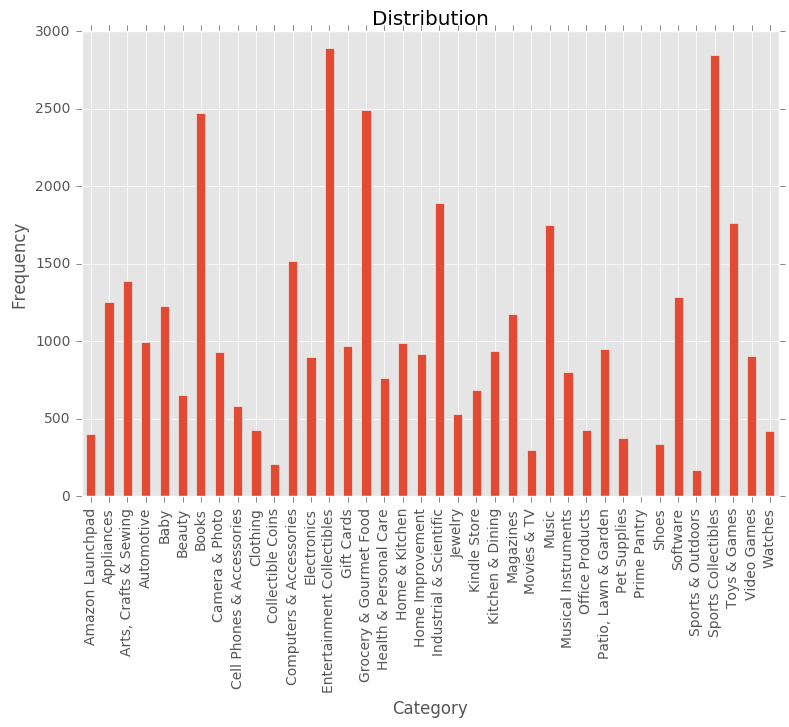

In [18]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#Get frequency distribution of category
freq = ADS.groupby('Category').title.count()

fig = plt.figure(figsize=(9,6)) 

freq.plot(kind='bar')
plt.title('Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.show()

Writing the analytical dataset to the disk.

In [19]:
ADS.to_csv("./ADS_S.csv", sep=',', encoding='utf-8')
prod_df_unique.to_csv("./Raw_Data.csv", sep= ',', encoding='utf-8')